### 🌎 **Some guiding questions to help you explore this data:**

1. Which factors could contribute to a sleep disorder?
2. Does an increased physical activity level result in a better quality of sleep?
3. Does the presence of a sleep disorder affect the subjective sleep quality metric?

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r"C:\Users\LENOVO\Desktop\sleep_health_and_life_style\data\cleaned_data.csv"
data = pd.read_csv(file_path)

data.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,is_sleep_disorder
0,1,27,Software Engineer,6.1,6,42,6,1,126/83,77,4200,Healthy,0
1,1,28,Doctor,6.2,6,60,8,0,125/80,75,10000,Healthy,0
2,1,28,Doctor,6.2,6,60,8,0,125/80,75,10000,Healthy,0
3,1,28,Sales Representative,5.9,4,30,8,3,140/90,85,3000,Sleep Apnea,1
4,1,28,Sales Representative,5.9,4,30,8,3,140/90,85,3000,Sleep Apnea,1


### Which factors could contribute to sleep disorder?

In [43]:
numeric_cols = data.select_dtypes(include=[np.number])

corr = numeric_cols.corr()["is_sleep_disorder"]
abs_corr = abs(corr).sort_values(ascending=False)
abs_corr = abs_corr[(abs_corr > 0.1) & (abs_corr < 1)]
abs_corr

BMI Category        0.722591
Age                 0.432007
Sleep Duration      0.338622
Heart Rate          0.330254
Quality of Sleep    0.310984
Gender              0.285824
Stress Level        0.181685
Name: is_sleep_disorder, dtype: float64

<Axes: >

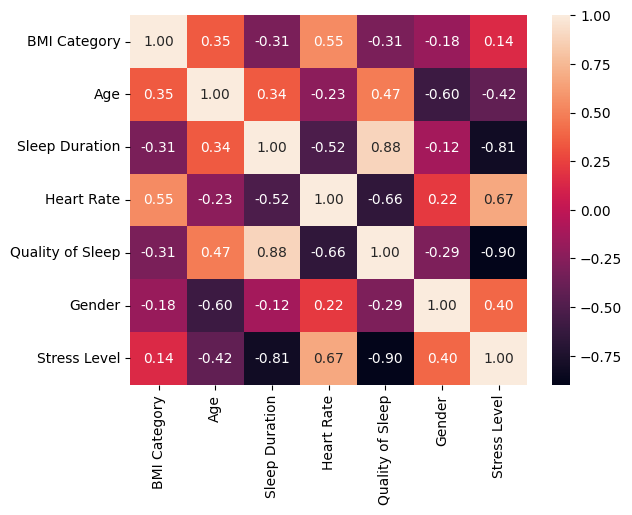

In [44]:
sns.heatmap(data[abs_corr.index].corr(), annot=True, fmt=".2f")

### Does an increased physical activity level result in a better quality of sleep?

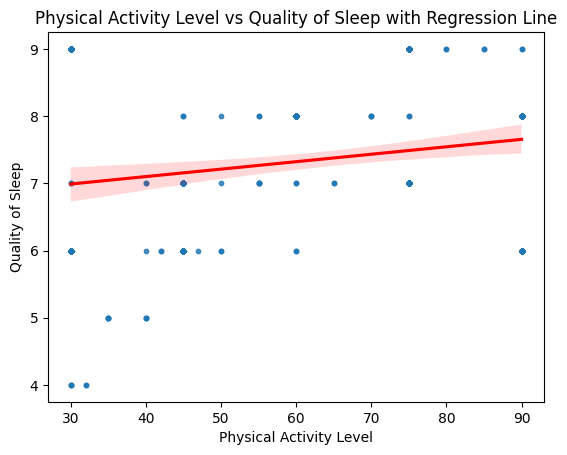

In [45]:
sns.regplot(x="Physical Activity Level", 
            y="Quality of Sleep", 
            data=data, 
            scatter_kws={'s':10}, 
            line_kws={'color':'red'})

plt.title("Physical Activity Level vs Quality of Sleep with Regression Line")
plt.show()


### Does the presence of a sleep disorder affect the subjective sleep quality metric?

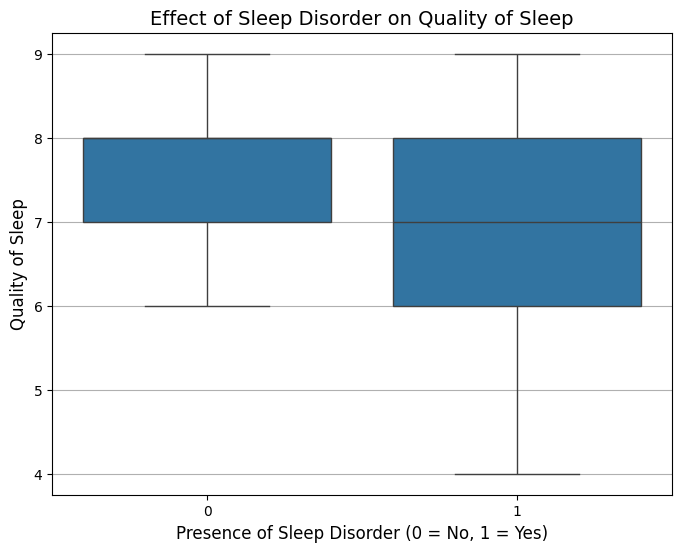

is_sleep_disorder
0    7.625571
1    6.870968
Name: Quality of Sleep, dtype: float64

In [46]:
# Group the data by sleep disorder presence and compute the mean Quality of Sleep
sleep_disorder_effect = data.groupby('is_sleep_disorder')['Quality of Sleep'].mean()

# Create a boxplot to visualize the effect of sleep disorder on sleep quality
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_sleep_disorder', y='Quality of Sleep', data=data)
plt.title("Effect of Sleep Disorder on Quality of Sleep", fontsize=14)
plt.xlabel("Presence of Sleep Disorder (0 = No, 1 = Yes)", fontsize=12)
plt.ylabel("Quality of Sleep", fontsize=12)
plt.grid(True, axis='y')
plt.show()

# Display the calculated means for each group
sleep_disorder_effect